## Описание
Из папки data со всеми статьями газеты берём тексты на эвенском. И собираем частотный словарь.

Зачем?

Чтобы 1 раз разметить слово, а потом брать разметку частотных не от анализазатора, а из словаря. + чтобы понимать, с какими случаями анализатору важнее справляться.

In [1]:
pip install razdel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import re
from razdel import sentenize
from collections import Counter, OrderedDict

In [3]:
PUNCTUATION = "!\"”“‘’#$%&'()*+, -—./:;<=>?@[\]^_`{|}~«»"

In [4]:
TRANSLIT_TABLE = {"дя" : "d'a",
    "тя" : "t'a",
    "ня" : "n'a",
    "де" : "d'e",
    "те" : "t'e",
    "че" : "če",
    "не" : "n'e",
    "фе" : "f'e",
    "дю" : "d'u",
    "тю" : "t'u",
    "ню" : "n'u",
    "дё" : "d'o",
    "тё" : "t'o",
    "нё" : "n'o",
    "сё" : "s'o",
    "ди" : "d'i",
    "а" : "a",
    "б" : "b",
    "в" : "w",
    "ҕ" : "γ",
    "г" : "g",
    "дь" : "d'",
    "ть" : "t'",
    "д" : "d",
    "ж" : "ž",
    "з" : "z",
    "и" : "i",
    "й" : "j",
    "ӄ" : "q",
    "к" : "k",
    "ль" : "l'",
    "л" : "l",
    "м" : "m",
    "нь" : "n'",
    "н" : "n",
    "ӈ" : "ŋ",
    "о" : "o",
    "п" : "p",
    "р" : "r",
    "с" : "s",
    "т" : "t",
    "у" : "u",
    "ф" : "f",
    "ч" : "č",
    "ц" : "c",
    "ш" : "š",
    "щ" : "š'",
    "ы" : "ə",
    "э" : "e",
    "ья" : "ja",
    "ью" : "ju",
    "ъе" : "je",
    "ъя" : "ja",
    "ъю" : "ju",
    "ю" : "ju",
    "я" : "ja",
    "е" : "je",
    "ъ" : "",
    "ь" : "'",
    "." : ".",
    "," : ",",
    "?" : "?",
    "!" : "!",
    "-" : "-",
    }

translit = OrderedDict(TRANSLIT_TABLE)
vowels = {"е":"\'e", "я":"\'a", "ю":"\'u", "ё":"\'o"}

In [5]:
def transliterate(string, translit, vowels):
    pattern = re.compile(r'(?<=[врпсгклзцвбмшжӈҕӄВРПСГКЛЗЦВБМШЖӇӃҔ])[еяюё]')
    string = pattern.sub(lambda x:vowels[x.group()], string)
    for cyr, ipa in translit.items():
        string = string.replace(cyr, ipa).replace(cyr.title(), ipa.title())
    return string
    
def simple_symbols(string):
    string = string.replace('γ','g').replace('q','k')
    return string

In [6]:
filenames = []
file_list = os.listdir('data')
for filename in file_list:
    if "eve" in filename:
        filenames.append(filename)

all_words = []
for filename in filenames:
    path = 'data/'+filename
    with open(path, encoding="utf-8") as f:
        text = f.read()
    sentences = []
    for prgraph in text.split('\n'):
        for sent in list(sentenize(prgraph)):
            sentences.append(sent.text)
    sentences = [sent for sent in sentences if sent != '']
    for sent in sentences:
        words = sent.split()
        for word in words:
           if word.strip(PUNCTUATION) != '':
               to_analyse = simple_symbols(transliterate(word.strip(PUNCTUATION).lower(),
                                       translit, vowels))
               all_words.append(to_analyse)

In [7]:
counter = Counter(all_words).most_common()

In [8]:
frequency_list = '\n'.join(['\t'.join(list(map(str, pair))) for pair in counter])
# frequency_list

In [9]:
with open('frequency_list.csv', 'w', encoding='utf-8') as file:
    file.write(frequency_list)

In [10]:
len(counter), len(all_words)

(19224, 44716)

## Облако слов


In [11]:
text = ' '.join(all_words)

In [12]:
# Импортируем библиотеку для визуализации
import matplotlib.pyplot as plt
%matplotlib inline

# Функция для визуализации облака слов
def plot_cloud(wordcloud):
    # Устанавливаем размер картинки
    plt.figure(figsize=(40, 30))
    # Показать изображение
    plt.imshow(wordcloud) 
    # Без подписей на осях
    plt.axis("off")

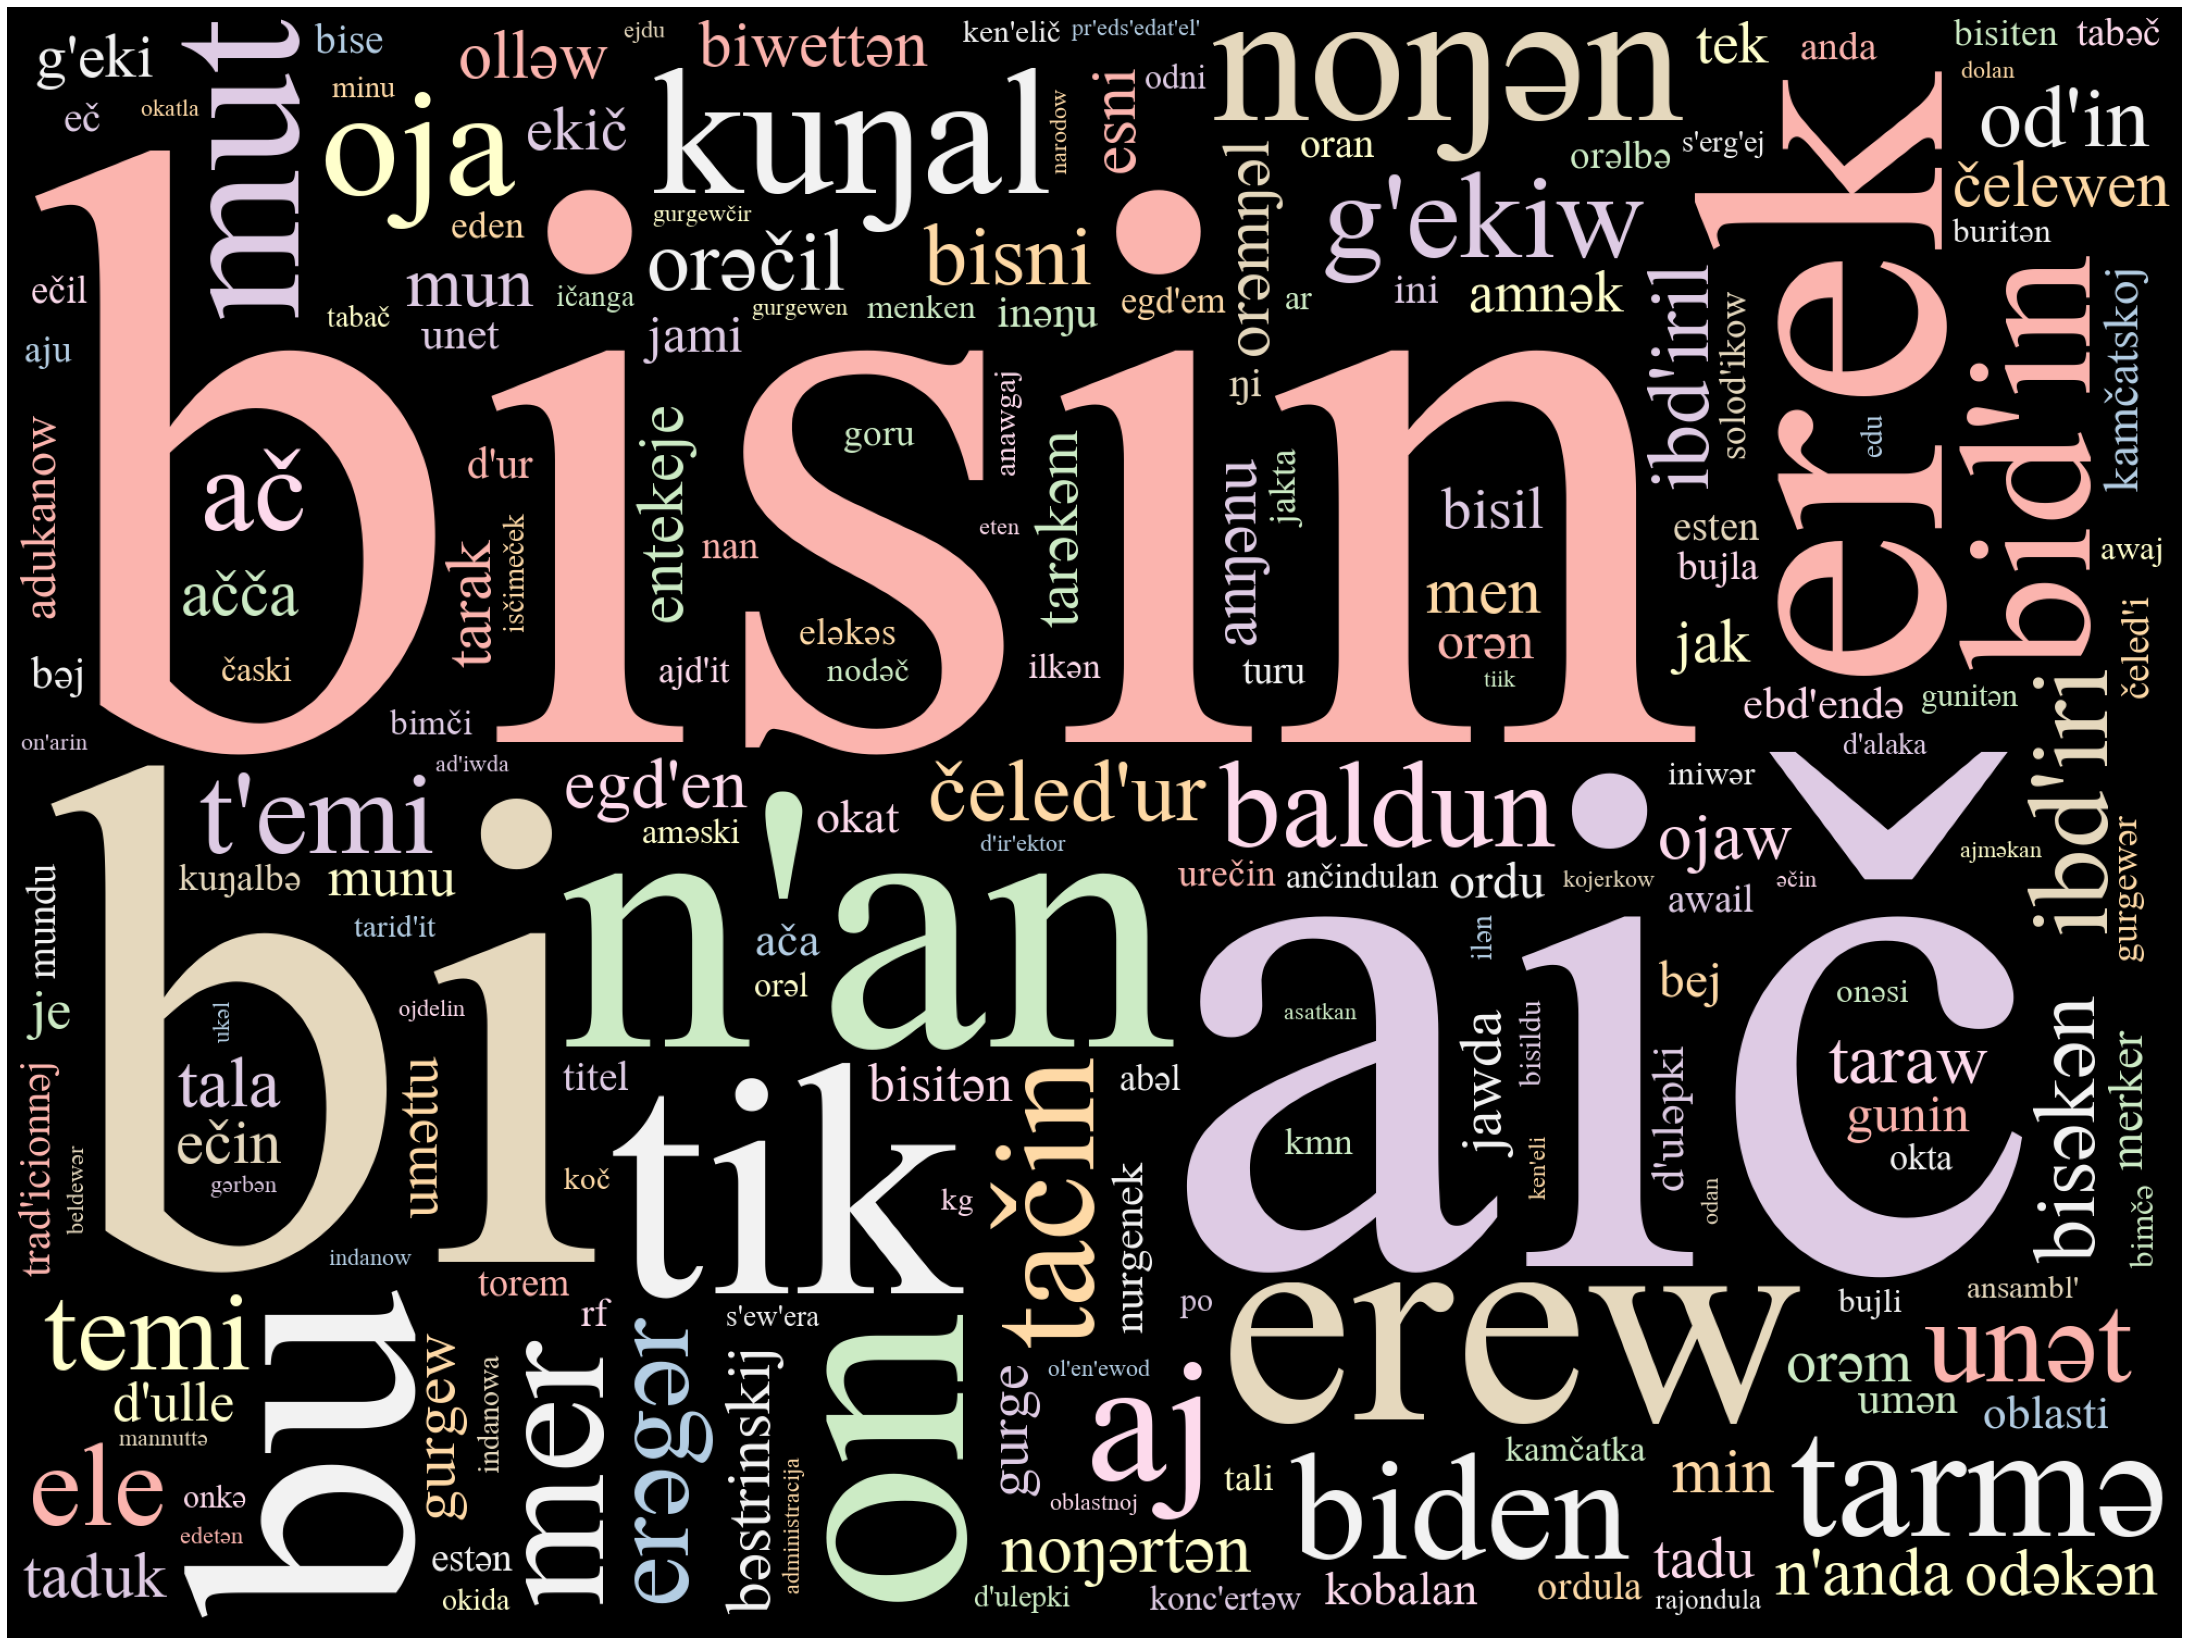

In [16]:
# Импортируем инструменты для облака слов и списки стоп-слов
from wordcloud import WordCloud
STOPWORDS = []
# Генерируем облако слов
wordcloud = WordCloud(font_path = 'DoulosSIL-Regular.ttf',
                      width = 2000, 
                      height = 1500, 
                      random_state=1, 
                      background_color='black', 
                      margin=20, 
                      colormap='Pastel1',
                      stopwords = STOPWORDS,  
                      collocations=False).generate(text)

# Рисуем картинку
plot_cloud(wordcloud)

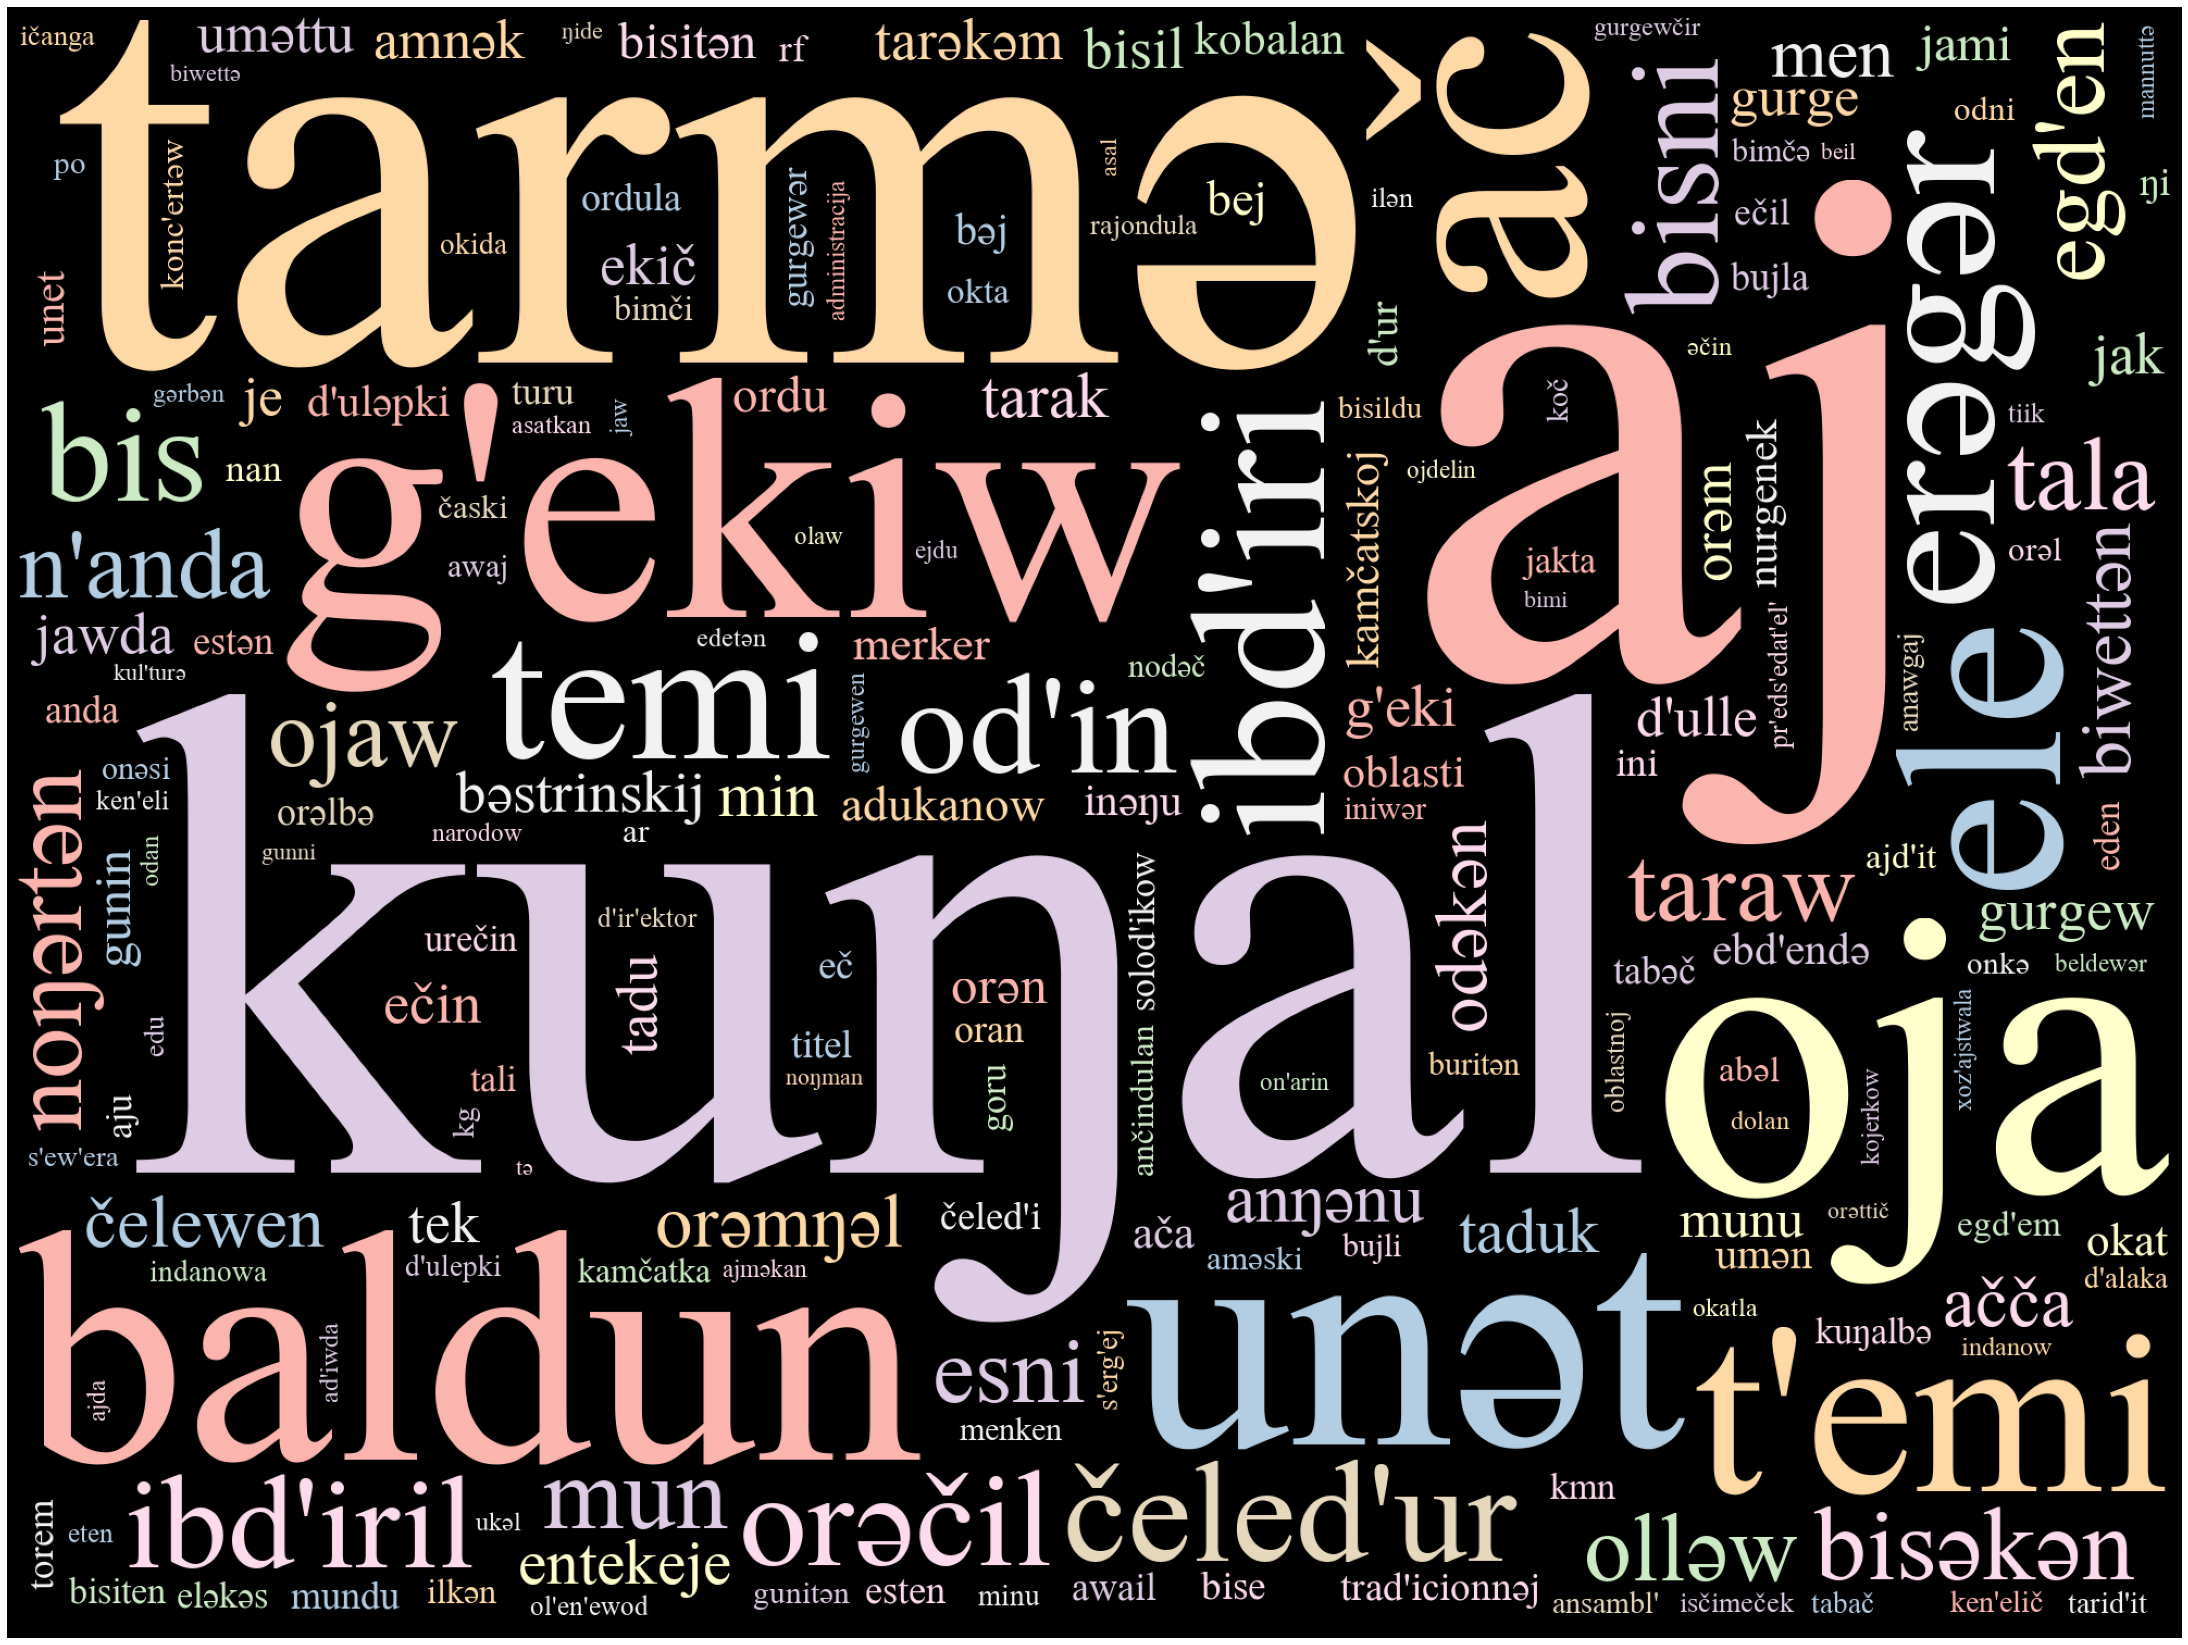

In [19]:
# Теперь со стопсловами
STOPWORDS = ['bisin', 'bu', 'bi', 'mut', 'erek', "n'an", 'erew', 'noŋan', "tik", "aič", 'noŋən', 'on', "bid'in", 'tačin', 'biden', 'mer']
# Генерируем облако слов
wordcloud = WordCloud(font_path = 'DoulosSIL-Regular.ttf',
                      width = 2000, 
                      height = 1500, 
                      random_state=1, 
                      background_color='black', 
                      margin=20, 
                      colormap='Pastel1',
                      stopwords = STOPWORDS,  
                      collocations=False).generate(text)

# Рисуем картинку
plot_cloud(wordcloud)

In [20]:
wordcloud.to_file('cloud_simple.png')

Списки n-грамм

In [21]:
import nltk

In [22]:
bigrm = list(nltk.bigrams(all_words))

In [24]:
counter = Counter(bigrm).most_common()

In [25]:
counter[:20]

[(('kamčatskoj', 'oblasti'), 33),
 (('aj', "bid'in"), 21),
 (('aj', 'bimčə'), 20),
 (('erew', 'anŋənu'), 19),
 (("trad'icionnəj", "хoz'ajstwala"), 17),
 (('mer', 'iniwər'), 16),
 (('aju', 'torem'), 14),
 (('mer', 'doliwər'), 13),
 (('narodow', "s'ew'era"), 12),
 (("ebd'endə", 'bisin'), 11),
 (('mer', 'gurgewər'), 11),
 (('bisil', "ibd'iril"), 11),
 (('ičanga', 'k'), 11),
 (('on', 'aj'), 10),
 (('eden', 'manur'), 10),
 (('too', "ol'en'ewod"), 10),
 (('ooo', "ol'en'ewod"), 10),
 (('erew', 'inəŋu'), 9),
 (("egd'en", 'gurge'), 9),
 (('aj', 'bimči'), 9)]

In [26]:
from nltk.util import ngrams

In [27]:
n = 3
threegramms = ngrams(all_words, n)

In [28]:
counter = Counter(threegramms).most_common()

In [29]:
counter[:20]

[(('on', 'aj', "bid'in"), 7),
 (("gow'ejnəj", "čl'en", 'sojuza'), 6),
 (("čl'en", 'sojuza', 'žurnalistow'), 6),
 (('sojuza', 'žurnalistow', 'rf'), 6),
 (("kor'ennəх", "maločisl'ennəх", 'narodow'), 6),
 (('kmns', 'i', 'dw'), 5),
 (('i', 'dw', 'rf'), 5),
 (("d'eputatow", 'kamčatskoj', 'oblasti'), 4),
 (('kirjak', "p'etrowič", 'adukanow'), 4),
 (('mut', 'bəstrinskij', 'rajondulat'), 4),
 (('b', 'r', "gow'ejnəj"), 4),
 (('r', "gow'ejnəj", "čl'en"), 4),
 (("zasluž'ennəj", 'rabotnik', "kul'turə"), 4),
 (('žurnalistow', 'rf', 'foto'), 4),
 (('rf', 'foto', 'awtora'), 4),
 (("ws'emirnəj", 'fond', "d'ikoj"), 4),
 (('fond', "d'ikoj", 'prirodə'), 4),
 (("maločisl'ennəх", 'narodow', "s'ew'era"), 4),
 (('dolčirin', "n'an", "on'arin"), 3),
 (('dni', "ew'enskoj", "kul'turə"), 3)]